In [1]:
%matplotlib inline


# Plot different SVM classifiers in the seeds dataset

This example is a small modification of the sciki-learn tutorial test.
Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. Here I consider only two features of the dataset:

- Seed area
- Seed asymmetry

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.



In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

#I use this dataset because this has clearly separated cathegories, 
#Read the database using pandas, 
#Note that bad lines are omitted with error_bad_lines=False
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/00236/seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)

#The headers are not given in the dataset, so we give them afterwords:
#1. area A, 
#2. perimeter P, 
#3. compactness C = 4*pi*A/P^2, 
#4. length of kernel, 
#5. width of kernel, 
#6. asymmetry coefficient 
#7. length of kernel groove. 
#8. Class: 1=Kama, 2=Rosa, 3=Canadian

df.columns = ["area","perimeter","compactness","kernel-length","kernel-width",
              "asymmetry","kernel-groove-length","class"]

#This shows the header of the database:
df.head()



Automatically created module for IPython interactive environment


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,kernel-length,kernel-width,asymmetry,kernel-groove-length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


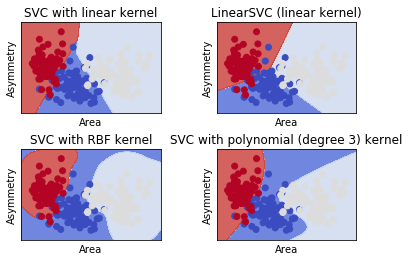

In [3]:

#In the database there are 3 classes of seeds:
#And skilearn can handle multiple classes


import numpy as np

#This sets class=2 to 0 and 3 to 1:
y = df.loc[:,'class']

#Extract some cathegories:
X=df.loc[:,["area","asymmetry"]]
#This is to convert the csv dictionary into a numpy matrix to later standarize:
X=X.as_matrix()


# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Area')
    plt.ylabel('Asymmetry')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()